In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# df_typecast = pd.read_csv("H:\study\OnlineRetail.csv") error:'utf-8' codec can't decode byte 0xa3 in position 28: invalid start byte

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 28: invalid start byte

In [34]:
df_typecast = pd.read_csv("H:\study\OnlineRetail.csv", encoding='unicode_escape')#encoding='utf-8'#'unicode_escape',ascii

In [35]:
pd.set_option('display.max_rows',50 )

In [36]:
df_typecast

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [37]:
df_typecast.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [38]:
df_typecast.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [39]:
#df_typecast['CustomerID'] = df_typecast['CustomerID'].astype('int64') #error because int64 never allowed non-finite val 
                                                     #so we need to typecast custemerId before handling its missing values 

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [40]:
df_typecast.CustomerID = df_typecast.CustomerID.fillna(0) #typecast before handling na val

In [41]:
df_typecast.isna().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [42]:
df_typecast

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [46]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
                medians='DarkBlue', caps='Gray')

<Figure size 432x288 with 0 Axes>

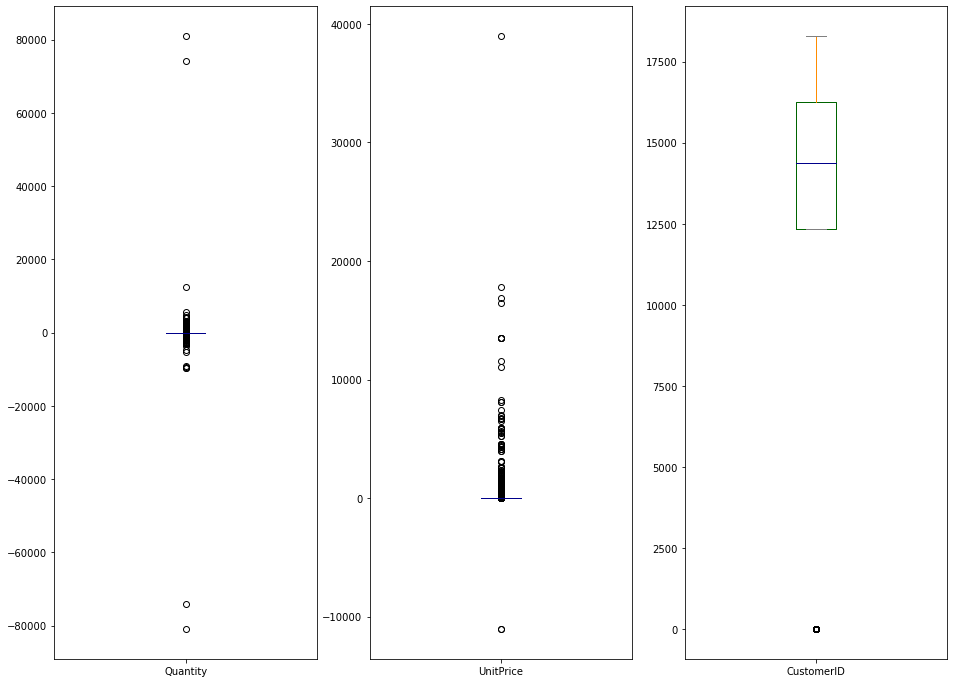

<Figure size 432x288 with 0 Axes>

In [47]:
df_typecast.plot(kind = 'box', subplots = bool,figsize = (16, 12),color=color) #we can ignore customerId because its Nominal in nature
plt.figure()

In [48]:
from pandas.plotting import scatter_matrix

<Figure size 432x288 with 0 Axes>

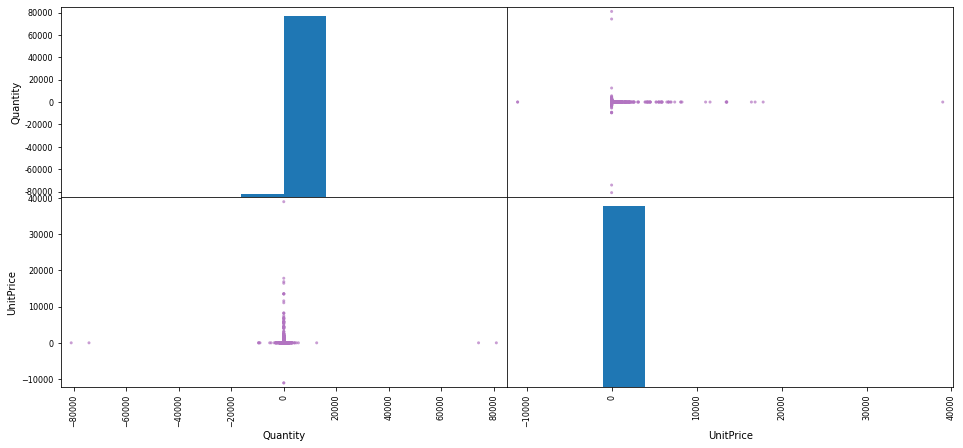

<Figure size 432x288 with 0 Axes>

In [49]:
scatter_matrix(df_typecast[['Quantity','UnitPrice']],figsize = (16,7), alpha = 0.7,color = '#b274c1')
plt.figure()

In [50]:
from pandas.plotting import bootstrap_plot

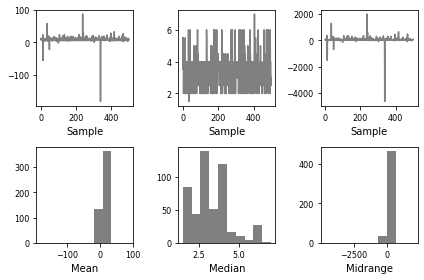

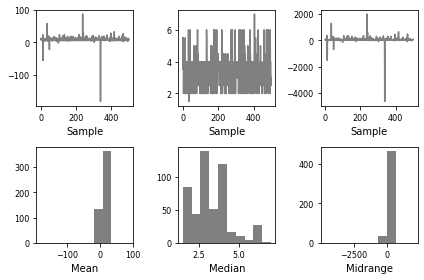

In [51]:
bootstrap_plot(df_typecast['Quantity'], size=50, samples=500, color='grey')

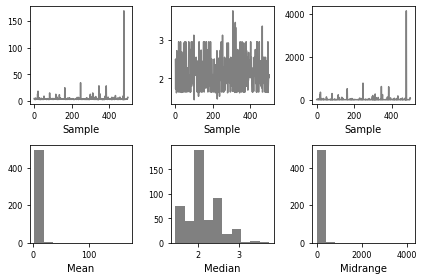

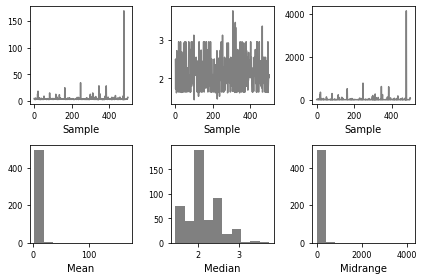

In [52]:
bootstrap_plot(df_typecast['UnitPrice'], size=50, samples=500, color='grey')

In [56]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

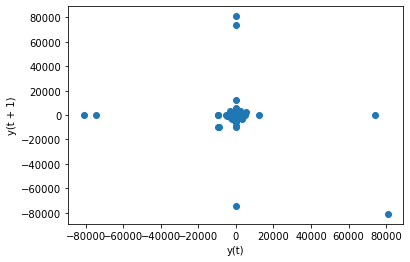

In [58]:
lag_plot(df_typecast['Quantity'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

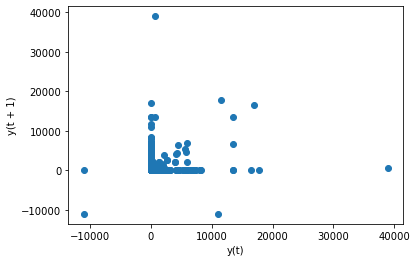

In [59]:
lag_plot(df_typecast['UnitPrice'])

In [61]:
from pandas.plotting import andrews_curves

In [66]:
#andrews_curves(df_typecast[['Quantity', 'UnitPrice']], class_column)
#plt.figure()

NameError: name 'class_column' is not defined

In [68]:
df_typecast.isna().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64